# Climate change study
by Rajat Jhalani
<br> Published Dec 7, 2021
<br>
<br> Data is provided by the Berkley Earth website. It tells us about the average temperature over the years of some major cities and countries around the world. This is an open source dataset with no license.
<br> Data source 1 (Main): https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByMajorCity.csv
<br> Data source 2: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv

Climate change is one of the pressing challenges faced by humans. The impact could be observed by the extreme weather conditions faced in the form of increased frequency of drought, flooding, hurricanes, wildfires, etc every year. Average global temperatures have increased by more than 2.2 degree celsius since 1880s. This article aims to study and visualize the trends in land temperatures observed across various cities of the world since 1849.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets
plt.style.use('ggplot')
import seaborn as sns
from IPython.display import Image, display

In [2]:
data = pd.read_csv('GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv')

In [3]:
data2 = pd.read_csv('GlobalLandTemperatures_GlobalLandTemperaturesByCountry.csv')

In [4]:
data = data.rename(columns={'dt':'Date'})

In [5]:
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Year'] = pd.to_datetime(data['Date']).dt.year
data

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,2,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,3,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,4,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,5,1849
...,...,...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E,5,2013
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E,6,2013
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E,7,2013
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E,8,2013


In [6]:
# Dropping missing values
data.dropna(axis = 0, inplace = True)

In [7]:
cities = np.unique(data['City'])
cities

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome',
       'Saint Petersbu

## Analyzing trends across different cities around the world

We look up at the temperature data across different years between 1850 and 2012. After analyzing the data across 10 cities around the world, we observe that temperatures have been increasing over the years. This is an indication that global warming is occuring around the world.

In [10]:
@ipywidgets.interact(city=['Bangalore', 'Cali', 'Madras', 'Madrid', 'Moscow', 'Sydney', 'New York', 'Rio De Janeiro',
                           'Paris', 'London'])
def temp_plot(city):
    data_city = data[data['City'] == city]
    years = [1900, 1950, 2012]
    fig, ax = plt.subplots(figsize=(10,8))
    for year in years:
        plt.plot(data_city.loc[data_city['Year'] == year, 'Month'], data_city.loc[data_city['Year'] == year,'AverageTemperature'], 
                 label = year)
    
    plt.title(f'Temperature variation in {city} over 100 years')
    plt.xlabel('Months')
    plt.ylabel('Average Temperature')
    plt.legend(loc='upper right')
    plt.show()


interactive(children=(Dropdown(description='city', options=('Bangalore', 'Cali', 'Madras', 'Madrid', 'Moscow',…

## Visualizing average land temperatures across different countries 

In [11]:
data2

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [12]:
data2 = data2.rename(columns={'dt':'Date'})

In [13]:
data2['Month'] = pd.to_datetime(data2['Date']).dt.month
data2['Year'] = pd.to_datetime(data2['Date']).dt.year
data2

,Date,AverageTemperature,AverageTemperatureUncertainty,Country,Month,Year
0,1743-11-01,4.384,2.294,Åland,11,1743
1,1743-12-01,NaN,NaN,Åland,12,1743
2,1744-01-01,NaN,NaN,Åland,1,1744
3,1744-02-01,NaN,NaN,Åland,2,1744
4,1744-03-01,NaN,NaN,Åland,3,1744
...,...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,5,2013
577458,2013-06-01,17.613,0.473,Zimbabwe,6,2013
577459,2013-07-01,17.000,0.453,Zimbabwe,7,2013
577460,2013-08-01,19.759,0.717,Zimbabwe,8,2013


In [14]:
# Dropping missing values
data2.dropna(axis = 0, inplace = True)

In [15]:
countries_u = np.unique(data['Country'])
countries_u

array(['Afghanistan', 'Angola', 'Australia', 'Bangladesh', 'Brazil',
       'Burma', 'Canada', 'Chile', 'China', 'Colombia',
       'Congo (Democratic Republic Of The)', "Côte D'Ivoire",
       'Dominican Republic', 'Egypt', 'Ethiopia', 'France', 'Germany',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Italy', 'Japan', 'Kenya',
       'Mexico', 'Morocco', 'Nigeria', 'Pakistan', 'Peru', 'Philippines',
       'Russia', 'Saudi Arabia', 'Senegal', 'Singapore', 'Somalia',
       'South Africa', 'South Korea', 'Spain', 'Sudan', 'Syria', 'Taiwan',
       'Tanzania', 'Thailand', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States', 'Vietnam', 'Zimbabwe'], dtype=object)

In [16]:
countries = np.unique(data2['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(data2[data2['Country'] == country]['AverageTemperature'].mean())

Let's take a look at the average land temperatures in different countries around the world. Based on the data, we could observe that Dijbouti has the highest average land temperatures and Greenland has the lowest. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


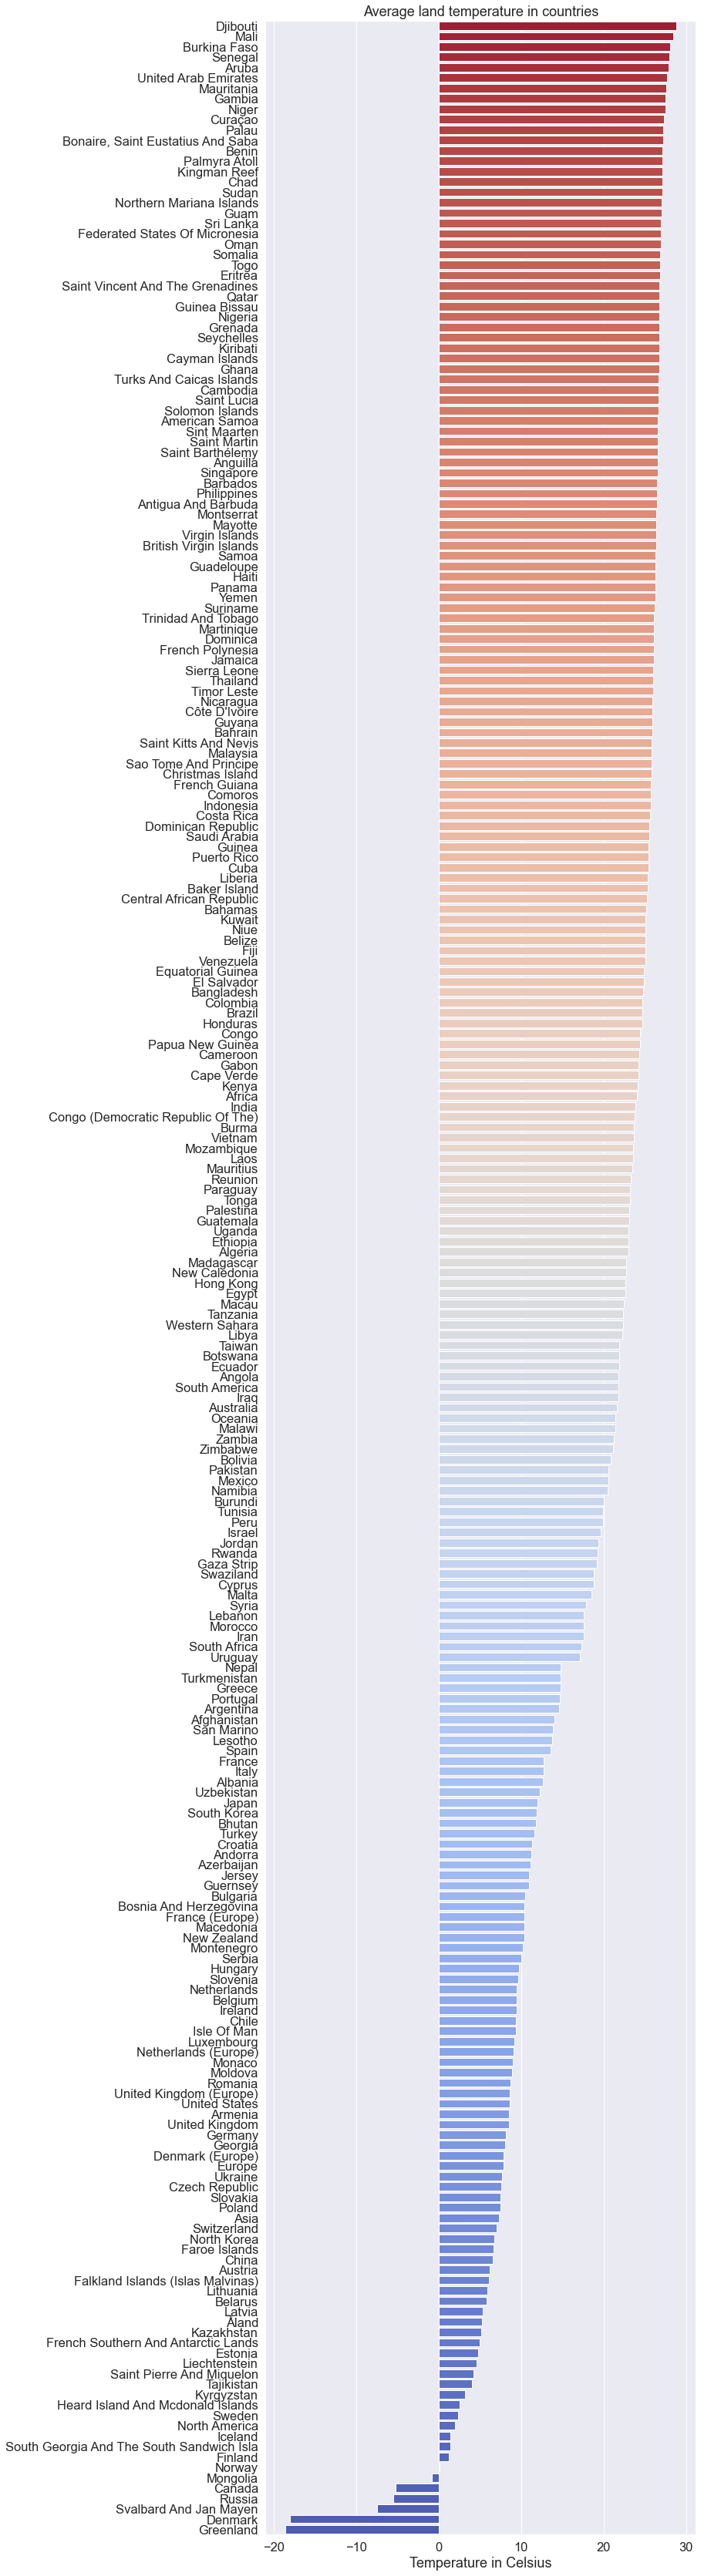

In [17]:
mean_avg_list, countries_list = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize=(10, 60))
colors = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_avg_list, countries_list, palette = colors[::-1])
Text = ax.set(xlabel='Temperature in Celsius', title='Average land temperature in countries')

## Average world temperature across the years

We can observe from the plot that the average world temperature has been increasing across the world. Since 1850, with the advent of industrial revolution, the average world temperature has risen by more than 2.5 degree celsius to date.

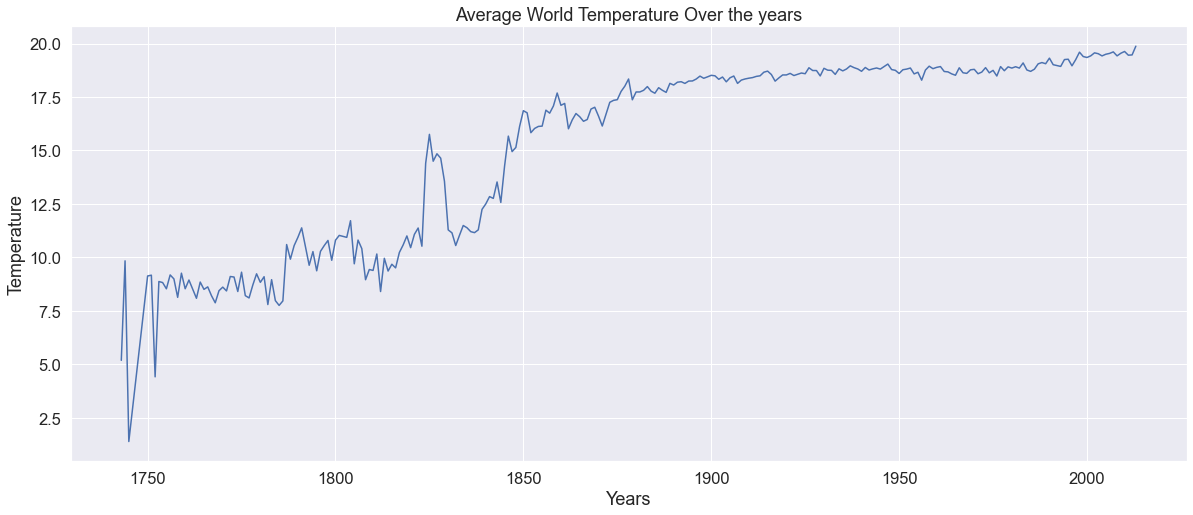

In [18]:
years = np.unique(data2.Year)
mean_world_temp = []

for year in years:
    mean_world_temp.append(data2[data2['Year'] == year]['AverageTemperature'].mean())
xaxis = np.arange(1850,2016,1)
fig = plt.figure(figsize = (20,8))
plt.title('Average World Temperature Over the years')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.plot(years, mean_world_temp)

Sources:

https://www.nytimes.com/article/climate-change-global-warming-faq.html
<br> https://medium.com/analytics-vidhya/climate-change-visualization-with-plotly-99905ae8d3bf